# Импортируем нужные библиотеки

In [216]:
import pandas as pd
import math
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Загружаем данные

In [171]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [172]:
train_df = pd.read_csv("/content/drive/MyDrive/trainct1.csv")
test_df = pd.read_csv("/content/drive/MyDrive/testct1.csv")

In [173]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11017 entries, 0 to 11016
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             10487 non-null  object 
 1   Age                         10487 non-null  float64
 2   AnnualIncome                10487 non-null  float64
 3   CreditScore                 9986 non-null   float64
 4   LoanAmount                  9986 non-null   float64
 5   LoanDuration                10487 non-null  float64
 6   MaritalStatus               10487 non-null  object 
 7   NumberOfDependents          10487 non-null  float64
 8   HomeOwnershipStatus         10487 non-null  object 
 9   MonthlyDebtPayments         9986 non-null   float64
 10  CreditCardUtilizationRate   10487 non-null  float64
 11  NumberOfOpenCreditLines     10487 non-null  float64
 12  NumberOfCreditInquiries     10487 non-null  float64
 13  DebtToIncomeRatio           104

In [174]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          5000 non-null   int64  
 1   ApplicationDate             5000 non-null   object 
 2   Age                         5000 non-null   int64  
 3   AnnualIncome                5000 non-null   int64  
 4   CreditScore                 5000 non-null   int64  
 5   LoanAmount                  5000 non-null   int64  
 6   LoanDuration                5000 non-null   int64  
 7   MaritalStatus               5000 non-null   object 
 8   NumberOfDependents          5000 non-null   int64  
 9   HomeOwnershipStatus         5000 non-null   object 
 10  MonthlyDebtPayments         5000 non-null   int64  
 11  CreditCardUtilizationRate   5000 non-null   float64
 12  NumberOfOpenCreditLines     5000 non-null   int64  
 13  NumberOfCreditInquiries     5000 

# Займемся обработкой датасета

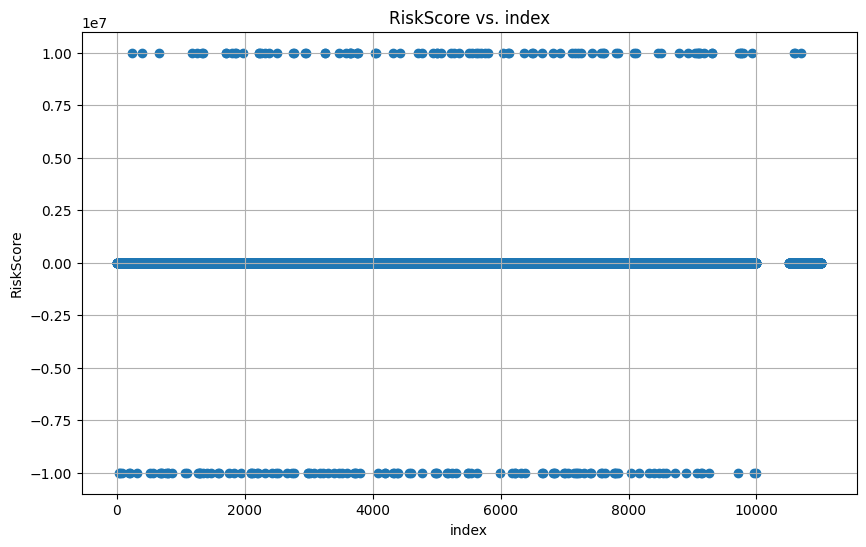

In [175]:
plt.figure(figsize=(10, 6))
plt.scatter(train_df.index, train_df['RiskScore'])
plt.xlabel('index')
plt.ylabel('RiskScore')
plt.title('RiskScore vs. index')
plt.grid(True)
plt.show()

In [176]:
train_df['RiskScore'].describe()

,RiskScore
count,1.048700e+04
mean,-2.569878e+04
std,1.431675e+06
min,-9.999999e+06
25%,3.256475e+01
50%,4.411876e+01
75%,6.535690e+01
max,1.000000e+07


In [177]:
train_df['RiskScore'].value_counts()

,count
RiskScore,
-9.999999e+06,121
1.000000e+07,94
6.554056e+01,3
6.785041e+01,3
3.513328e+01,3
...,...
5.586611e+01,1
3.650778e+01,1
4.662566e+01,1


нашел выбросы, их надо удалить

In [178]:
train_df = train_df[(train_df['RiskScore'] > -9.999999e+06) & (train_df['RiskScore'] < 1.000000e+07)]

In [179]:
train_df['RiskScore'].value_counts()

,count
RiskScore,
59.676278,3
77.817044,3
50.408446,3
65.540564,3
37.044467,3
...,...
55.866106,1
36.507778,1
46.625660,1


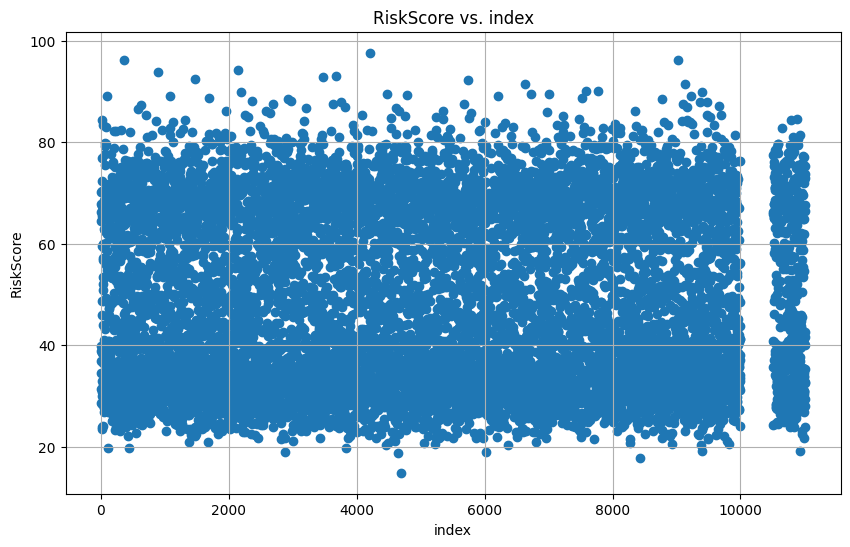

In [180]:
plt.figure(figsize=(10, 6))
plt.scatter(train_df.index, train_df['RiskScore'])
plt.xlabel('index')
plt.ylabel('RiskScore')
plt.title('RiskScore vs. index')
plt.grid(True)
plt.show()

пробел в графике заключается в том, чту нас просто отуствуют эти индексы

##Удалим все строчки где значение NaN больше 20

In [181]:
clean_train_df = train_df.dropna(thresh=train_df.shape[1] - 20).copy()

In [182]:
clean_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10272 entries, 0 to 11016
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             10272 non-null  object 
 1   Age                         10272 non-null  float64
 2   AnnualIncome                10272 non-null  float64
 3   CreditScore                 9787 non-null   float64
 4   LoanAmount                  9787 non-null   float64
 5   LoanDuration                10272 non-null  float64
 6   MaritalStatus               10272 non-null  object 
 7   NumberOfDependents          10272 non-null  float64
 8   HomeOwnershipStatus         10272 non-null  object 
 9   MonthlyDebtPayments         9787 non-null   float64
 10  CreditCardUtilizationRate   10272 non-null  float64
 11  NumberOfOpenCreditLines     10272 non-null  float64
 12  NumberOfCreditInquiries     10272 non-null  float64
 13  DebtToIncomeRatio           10272 no

## Заменим в CreditScore, LoanAmount, MonthlyDebtPayments, BankruptcyHistory, CheckingAccountBalance, TotalAssets, NetWorth, BaseInterestRate на медианы этих столбцов                   

In [183]:
clean_train_df["CreditScore"] = clean_train_df["CreditScore"].fillna(clean_train_df["CreditScore"].median())

In [184]:
clean_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10272 entries, 0 to 11016
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             10272 non-null  object 
 1   Age                         10272 non-null  float64
 2   AnnualIncome                10272 non-null  float64
 3   CreditScore                 10272 non-null  float64
 4   LoanAmount                  9787 non-null   float64
 5   LoanDuration                10272 non-null  float64
 6   MaritalStatus               10272 non-null  object 
 7   NumberOfDependents          10272 non-null  float64
 8   HomeOwnershipStatus         10272 non-null  object 
 9   MonthlyDebtPayments         9787 non-null   float64
 10  CreditCardUtilizationRate   10272 non-null  float64
 11  NumberOfOpenCreditLines     10272 non-null  float64
 12  NumberOfCreditInquiries     10272 non-null  float64
 13  DebtToIncomeRatio           10272 no

In [185]:
columns = ["LoanAmount", "MonthlyDebtPayments", "BankruptcyHistory", "CheckingAccountBalance", "TotalAssets", "NetWorth", "BaseInterestRate"]
for column in columns:
    clean_train_df[column] = clean_train_df[column].fillna(clean_train_df[column].median())

In [186]:
clean_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10272 entries, 0 to 11016
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             10272 non-null  object 
 1   Age                         10272 non-null  float64
 2   AnnualIncome                10272 non-null  float64
 3   CreditScore                 10272 non-null  float64
 4   LoanAmount                  10272 non-null  float64
 5   LoanDuration                10272 non-null  float64
 6   MaritalStatus               10272 non-null  object 
 7   NumberOfDependents          10272 non-null  float64
 8   HomeOwnershipStatus         10272 non-null  object 
 9   MonthlyDebtPayments         10272 non-null  float64
 10  CreditCardUtilizationRate   10272 non-null  float64
 11  NumberOfOpenCreditLines     10272 non-null  float64
 12  NumberOfCreditInquiries     10272 non-null  float64
 13  DebtToIncomeRatio           10272 no

In [187]:
clean_train_df["ApplicationDate"] = pd.to_datetime(clean_train_df["ApplicationDate"])

### Добавим возрастные страты и заменим модой по стратам

In [188]:
clean_train_df["LoanPurpose"].value_counts()

,count
LoanPurpose,
Home,2919
Debt Consolidation,2407
Auto,1968
Education,1573
Other,920


In [189]:
clean_train_df["LoanPurpose"].describe()

,LoanPurpose
count,9787
unique,5
top,Home
freq,2919


In [190]:
clean_train_df[clean_train_df.index == 13]["LoanPurpose"]

,LoanPurpose
13,NaN


In [191]:
clean_train_df["Age"].describe()

,Age
count,10272.000000
mean,39.862344
std,11.604454
min,18.000000
25%,32.000000
50%,40.000000
75%,48.000000
max,80.000000


In [192]:
bins = [17, 30, 45, 60, 100]
labels = ['18-30', '31-45', '46-60', '61+']

clean_train_df['AgeGroup'] = pd.cut(clean_train_df['Age'], bins=bins, labels=labels, right=False)

In [193]:
clean_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10272 entries, 0 to 11016
Data columns (total 37 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ApplicationDate             10272 non-null  datetime64[ns]
 1   Age                         10272 non-null  float64       
 2   AnnualIncome                10272 non-null  float64       
 3   CreditScore                 10272 non-null  float64       
 4   LoanAmount                  10272 non-null  float64       
 5   LoanDuration                10272 non-null  float64       
 6   MaritalStatus               10272 non-null  object        
 7   NumberOfDependents          10272 non-null  float64       
 8   HomeOwnershipStatus         10272 non-null  object        
 9   MonthlyDebtPayments         10272 non-null  float64       
 10  CreditCardUtilizationRate   10272 non-null  float64       
 11  NumberOfOpenCreditLines     10272 non-null  float64       


In [194]:
clean_train_df['LoanPurpose'] = clean_train_df.groupby('AgeGroup', observed=True)['LoanPurpose'].transform(lambda x: x.fillna(x.mode()[0]))

In [195]:
clean_train_df[clean_train_df.index == 13]["LoanPurpose"]

,LoanPurpose
13,Home


In [196]:
clean_train_df["LoanPurpose"].describe()

,LoanPurpose
count,10272
unique,5
top,Home
freq,3404


In [197]:
clean_train_df.tail()

,ApplicationDate,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,HomeOwnershipStatus,MonthlyDebtPayments,...,EducationLevel,Experience,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore,AgeGroup
11011,1980-01-15,39.0,300000.0,850.0,7721.0,72.0,Divorced,5.0,Own,276.0,...,Associate,16.0,18607.0,0.107721,0.108596,146.407421,0.016896,1.0,28.051757,31-45
11012,2010-07-10,57.0,300000.0,850.0,14756.0,48.0,Married,2.0,Own,620.0,...,Associate,38.0,167544.0,0.094756,0.106387,378.792448,0.039952,1.0,32.440586,46-60
11013,2003-10-22,28.0,15000.0,300.0,51361.0,96.0,Single,1.0,Own,696.0,...,Bachelor,5.0,116879.0,0.446361,0.401087,1793.042130,1.991234,0.0,67.673170,18-30
11014,1983-05-12,23.0,15000.0,302.0,30724.0,72.0,Married,3.0,Rent,413.0,...,Associate,0.0,250778.0,0.404724,0.360670,1047.672294,1.168538,0.0,75.292707,18-30
11016,2000-01-07,41.0,300000.0,722.0,21836.0,60.0,Single,2.0,Own,398.0,...,High School,20.0,27245.0,0.182072,0.111351,513.709256,0.040548,1.0,32.805455,31-45


## Сделаем OHE для категориальных признаков


In [198]:
categorical_columns = ["MaritalStatus", "HomeOwnershipStatus", "LoanPurpose", "EmploymentStatus", "EducationLevel", "AgeGroup"]
for categorical_column in categorical_columns:
    encoder = OneHotEncoder(sparse_output=False, drop=None)
    encoded = encoder.fit_transform(clean_train_df[[categorical_column]])
    encoded_columns = encoder.get_feature_names_out([categorical_column])
    encoded_df = pd.DataFrame(encoded, columns=encoded_columns, index=clean_train_df.index)
    clean_train_df = pd.concat([clean_train_df.drop(columns=[categorical_column]), encoded_df], axis=1)


In [199]:
clean_train_df

,ApplicationDate,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,...,EmploymentStatus_Unemployed,EducationLevel_Associate,EducationLevel_Bachelor,EducationLevel_Doctorate,EducationLevel_High School,EducationLevel_Master,AgeGroup_18-30,AgeGroup_31-45,AgeGroup_46-60,AgeGroup_61+
0,2010-06-26,27.0,66829.0,549.0,17290.0,60.0,1.0,1095.0,0.151985,2.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1996-09-23,55.0,172147.0,850.0,16110.0,36.0,1.0,211.0,0.175693,3.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,2015-01-19,51.0,300000.0,850.0,38436.0,36.0,0.0,546.0,0.444605,3.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1981-05-12,25.0,34683.0,847.0,19186.0,48.0,0.0,153.0,0.188452,7.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,1995-05-07,55.0,300000.0,850.0,30437.0,48.0,2.0,562.0,0.273431,3.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11011,1980-01-15,39.0,300000.0,850.0,7721.0,72.0,5.0,276.0,0.215136,2.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
11012,2010-07-10,57.0,300000.0,850.0,14756.0,48.0,2.0,620.0,0.477742,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
11013,2003-10-22,28.0,15000.0,300.0,51361.0,96.0,1.0,696.0,0.322554,2.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
11014,1983-05-12,23.0,15000.0,302.0,30724.0,72.0,3.0,413.0,0.497062,2.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


## Добавим новые признаки из ApplicationDate, т.к. линейная регрессия из sklearn не умеет обрабаотывать категориальные признаки и признаки в формате datatime

In [201]:
clean_train_df['ApplicationYear'] = clean_train_df['ApplicationDate'].dt.year
clean_train_df['ApplicationMonth'] = clean_train_df['ApplicationDate'].dt.month
clean_train_df['ApplicationDay'] = clean_train_df['ApplicationDate'].dt.day
clean_train_df['ApplicationDayOfWeek'] = clean_train_df['ApplicationDate'].dt.dayofweek
clean_train_df['ApplicationDayOfYear'] = clean_train_df['ApplicationDate'].dt.dayofyear
clean_train_df['ApplicationWeekOfYear'] = clean_train_df['ApplicationDate'].dt.isocalendar().week
clean_train_df['ApplicationQuarter'] = clean_train_df['ApplicationDate'].dt.quarter
clean_train_df['ApplicationIsWeekend'] = clean_train_df['ApplicationDayOfWeek'].isin([5, 6]).astype(int)


## Подготовим тестовые данные

In [202]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ID                          5000 non-null   int64         
 1   ApplicationDate             5000 non-null   datetime64[ns]
 2   Age                         5000 non-null   int64         
 3   AnnualIncome                5000 non-null   int64         
 4   CreditScore                 5000 non-null   int64         
 5   LoanAmount                  5000 non-null   int64         
 6   LoanDuration                5000 non-null   int64         
 7   MaritalStatus               5000 non-null   object        
 8   NumberOfDependents          5000 non-null   int64         
 9   HomeOwnershipStatus         5000 non-null   object        
 10  MonthlyDebtPayments         5000 non-null   int64         
 11  CreditCardUtilizationRate   5000 non-null   float64     

In [203]:
test_df["ApplicationDate"] = pd.to_datetime(test_df["ApplicationDate"])

test_df['ApplicationYear'] = test_df['ApplicationDate'].dt.year
test_df['ApplicationMonth'] = test_df['ApplicationDate'].dt.month
test_df['ApplicationDay'] = test_df['ApplicationDate'].dt.day
test_df['ApplicationDayOfWeek'] = test_df['ApplicationDate'].dt.dayofweek
test_df['ApplicationDayOfYear'] = test_df['ApplicationDate'].dt.dayofyear
test_df['ApplicationWeekOfYear'] = test_df['ApplicationDate'].dt.isocalendar().week
test_df['ApplicationQuarter'] = test_df['ApplicationDate'].dt.quarter
test_df['ApplicationIsWeekend'] = test_df['ApplicationDayOfWeek'].isin([5, 6]).astype(int)

bins = [17, 30, 45, 60, 100]
labels = ['18-30', '31-45', '46-60', '61+']
test_df['AgeGroup'] = pd.cut(test_df['Age'], bins=bins, labels=labels, right=False)

categorical_columns = ["MaritalStatus", "HomeOwnershipStatus", "LoanPurpose", "EmploymentStatus", "EducationLevel", "AgeGroup"]

for categorical_column in categorical_columns:
    encoder = OneHotEncoder(sparse_output=False, drop=None)
    encoded = encoder.fit_transform(test_df[[categorical_column]])
    encoded_columns = encoder.get_feature_names_out([categorical_column])
    encoded_df = pd.DataFrame(encoded, columns=encoded_columns, index=test_df.index)
    test_df = pd.concat([test_df, encoded_df], axis=1)
test_df = test_df.drop(columns = categorical_columns)

In [204]:
clean_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10272 entries, 0 to 11016
Data columns (total 64 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   ApplicationDate                 10272 non-null  datetime64[ns]
 1   Age                             10272 non-null  float64       
 2   AnnualIncome                    10272 non-null  float64       
 3   CreditScore                     10272 non-null  float64       
 4   LoanAmount                      10272 non-null  float64       
 5   LoanDuration                    10272 non-null  float64       
 6   NumberOfDependents              10272 non-null  float64       
 7   MonthlyDebtPayments             10272 non-null  float64       
 8   CreditCardUtilizationRate       10272 non-null  float64       
 9   NumberOfOpenCreditLines         10272 non-null  float64       
 10  NumberOfCreditInquiries         10272 non-null  float64       
 11  DebtToI

## Прикручиваем модель

In [223]:
X = clean_train_df.drop(columns=['RiskScore', 'ApplicationDate'])
y = clean_train_df['RiskScore']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1.0],
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 1.0]
}

elastic_net = ElasticNet(max_iter=5000, random_state=42)
grid_search = GridSearchCV(
    estimator=elastic_net,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=5,
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_
print(f"Лучшие параметры: {best_params}")

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE) на тестовой выборке: {mse}")

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Лучшие параметры: {'alpha': 0.01, 'l1_ratio': 1.0}
Mean Squared Error (MSE) на тестовой выборке: 21.765289777621785


## Обучаем на всей обучеющей выборке для предсказания на test_df

In [229]:
X = clean_train_df.drop(columns=['RiskScore', 'ApplicationDate'])
y = clean_train_df['RiskScore']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1.0],
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 1.0]
}

elastic_net = ElasticNet(max_iter=5000, random_state=42)
grid_search = GridSearchCV(
    estimator=elastic_net,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=5,
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_scaled, y)

best_params = grid_search.best_params_
print(f"Лучшие параметры: {best_params}")

best_model = grid_search.best_estimator_

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Лучшие параметры: {'alpha': 0.01, 'l1_ratio': 0.7}


In [230]:
X_test_final = test_df.drop(columns=['ApplicationDate'])

In [232]:
common_columns = X.columns.intersection(X_test_final.columns)
X_test_final = X_test_final[common_columns]

X_test_scaled = scaler.transform(X_test_final)

test_predictions = best_model.predict(X_test_scaled)

submission = pd.DataFrame({'ID': test_df['ID'], 'RiskScore': test_predictions})
submission.to_csv('ubmiss.csv', index=False)
print("Файл submission.csv успешно создан.")


Файл submission.csv успешно создан.
